#  Testing of the models 

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
test_tfidf_vectorizer = pickle.load(open("../models/tf_processor.pkl", "rb"))
test_count_vectorizer = pickle.load(open("../models/ct_processor.pkl", "rb"))


tfidf_svm_model = pickle.load(open("../models/svm_best_model_tfidf.pkl", "rb"))
tfidf_rf_model = pickle.load(open("../models/rf_best_model_tfidf.pkl", "rb"))
tfidf_xg_model = pickle.load(open("../models/xg_best_model_tfidf.pkl", "rb"))


count_svm_model = pickle.load(open("../models/svm_best_model_count.pkl", "rb"))
count_rf_model = pickle.load(open("../models/rf_best_model_count.pkl", "rb"))
count_xg_model = pickle.load(open("../models/xg_best_model_count.pkl", "rb"))

In [3]:
testing_data = pd.read_csv('../data/raw/test.csv')

In [4]:
y_testing = testing_data['Label']

In [5]:
X_testing_tfidf = test_tfidf_vectorizer.transform(testing_data['Title_Text'])
X_testing_count = test_count_vectorizer.transform(testing_data['Title_Text'])

# Using the Ensemble method with TFIDF Vectorizer

In [6]:
def create_ensemble1(X):
    svm_preds= tfidf_svm_model.predict(X)
    rf_preds= tfidf_rf_model.predict(X)
    ensemble_preds= [1 if (svm_pred + rf_pred) >= 1 
                     else 0 for svm_pred, rf_pred in zip(svm_preds, rf_preds)]
    return ensemble_preds

In [7]:
def create_ensemble2(X):
    svm_preds= tfidf_svm_model.predict(X)
    xg_preds= tfidf_xg_model.predict(X)
    ensemble_preds= [1 if (svm_pred + xg_pred) >= 1 
                     else 0 for svm_pred, xg_pred in zip(svm_preds, xg_preds)]
    return ensemble_preds

In [8]:
def create_ensemble3(X):
    xg_preds= tfidf_xg_model.predict(X)
    rf_preds= tfidf_rf_model.predict(X)
    ensemble_preds= [1 if (xg_pred + rf_pred) >= 1 
                     else 0 for xg_pred, rf_pred in zip(xg_preds, rf_preds)]
    return ensemble_preds

In [9]:
ensemble_testing_pred1 = create_ensemble1(X_testing_tfidf)
print(classification_report(y_testing,ensemble_testing_pred1))

              precision    recall  f1-score   support

           0       0.75      0.51      0.61      1571
           1       0.86      0.95      0.90      5068

    accuracy                           0.84      6639
   macro avg       0.81      0.73      0.75      6639
weighted avg       0.84      0.84      0.83      6639



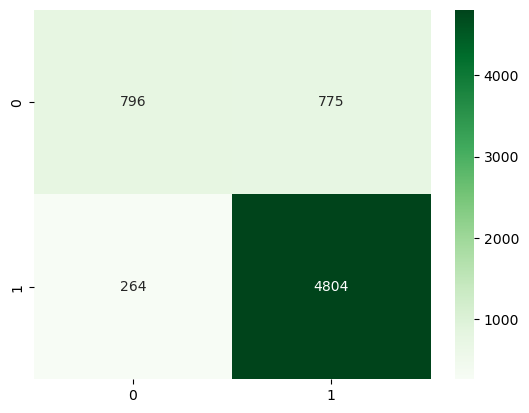

In [10]:
con_matrix = confusion_matrix(y_testing,ensemble_testing_pred1)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Greens")

In [11]:
auc_roc1 = roc_auc_score(y_testing,ensemble_testing_pred1)
auc_roc1

0.7272960430695061

In [12]:
ensemble_testing_pred2 = create_ensemble2(X_testing_tfidf)
print(classification_report(y_testing,ensemble_testing_pred2))

              precision    recall  f1-score   support

           0       0.83      0.30      0.44      1571
           1       0.82      0.98      0.89      5068

    accuracy                           0.82      6639
   macro avg       0.82      0.64      0.67      6639
weighted avg       0.82      0.82      0.79      6639



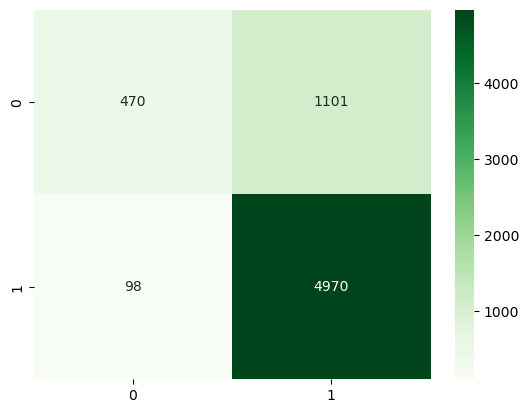

In [13]:
con_matrix = confusion_matrix(y_testing,ensemble_testing_pred2)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Greens")

In [14]:
auc_roc2 = roc_auc_score(y_testing,ensemble_testing_pred2)
auc_roc2

0.6399177425083787

In [15]:
ensemble_testing_pred3 = create_ensemble3(X_testing_tfidf)
print(classification_report(y_testing,ensemble_testing_pred3))

              precision    recall  f1-score   support

           0       0.79      0.31      0.44      1571
           1       0.82      0.97      0.89      5068

    accuracy                           0.82      6639
   macro avg       0.80      0.64      0.67      6639
weighted avg       0.81      0.82      0.78      6639



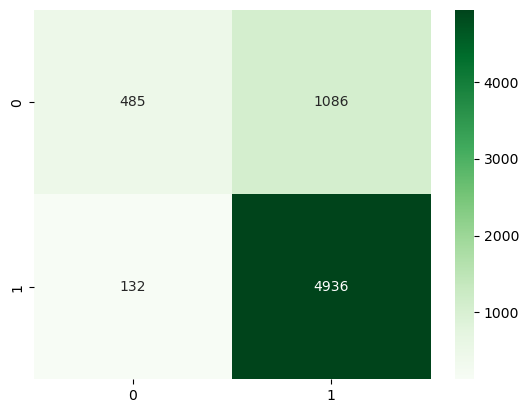

In [16]:
con_matrix = confusion_matrix(y_testing,ensemble_testing_pred3)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Greens")

In [17]:
auc_roc3 = roc_auc_score(y_testing,ensemble_testing_pred3)
auc_roc3

0.641337391362888

# Using the Ensemble method with Count Vectorizer

In [18]:
def create_ensemble4(X):
    svm_preds= count_svm_model.predict(X)
    rf_preds= count_rf_model.predict(X)
    ensemble_preds= [1 if (svm_pred + rf_pred) >= 1 
                     else 0 for svm_pred, rf_pred in zip(svm_preds, rf_preds)]
    return ensemble_preds

In [19]:
def create_ensemble5(X):
    svm_preds= count_svm_model.predict(X)
    xg_preds= count_xg_model.predict(X)
    ensemble_preds= [1 if (svm_pred + xg_pred) >= 1 
                     else 0 for svm_pred, xg_pred in zip(svm_preds, xg_preds)]
    return ensemble_preds

In [20]:
def create_ensemble6(X):
    xg_preds= count_xg_model.predict(X)
    rf_preds= count_rf_model.predict(X)
    ensemble_preds= [1 if (xg_pred + rf_pred) >= 1 
                     else 0 for xg_pred, rf_pred in zip(xg_preds, rf_preds)]
    return ensemble_preds

In [21]:
ensemble_testing_pred4 = create_ensemble4(X_testing_count)
print(classification_report(y_testing,ensemble_testing_pred4))

              precision    recall  f1-score   support

           0       0.75      0.51      0.60      1571
           1       0.86      0.95      0.90      5068

    accuracy                           0.84      6639
   macro avg       0.80      0.73      0.75      6639
weighted avg       0.83      0.84      0.83      6639



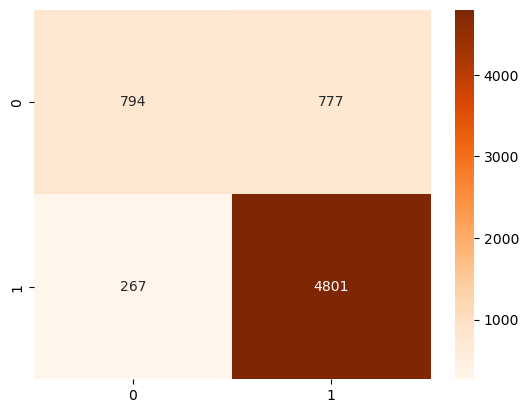

In [22]:
con_matrix = confusion_matrix(y_testing,ensemble_testing_pred4)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Oranges")

In [23]:
auc_roc4 = roc_auc_score(y_testing,ensemble_testing_pred4)
auc_roc4

0.7263635310885892

In [24]:
ensemble_testing_pred5 = create_ensemble5(X_testing_count)
print(classification_report(y_testing,ensemble_testing_pred5))

              precision    recall  f1-score   support

           0       0.84      0.28      0.42      1571
           1       0.82      0.98      0.89      5068

    accuracy                           0.82      6639
   macro avg       0.83      0.63      0.66      6639
weighted avg       0.82      0.82      0.78      6639



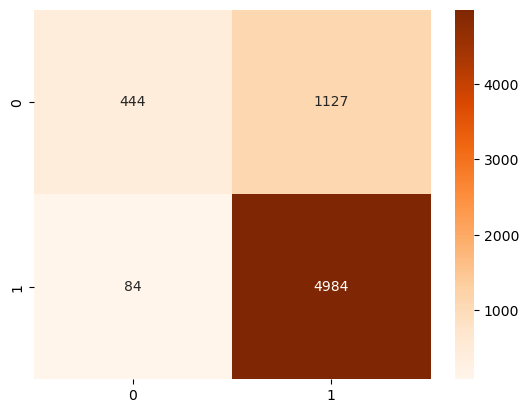

In [25]:
con_matrix = confusion_matrix(y_testing,ensemble_testing_pred5)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Oranges")

In [26]:
auc_roc5 = roc_auc_score(y_testing,ensemble_testing_pred5)
auc_roc5

0.633023973891423

In [27]:
ensemble_testing_pred6 = create_ensemble6(X_testing_count)
print(classification_report(y_testing,ensemble_testing_pred6))

              precision    recall  f1-score   support

           0       0.82      0.30      0.44      1571
           1       0.82      0.98      0.89      5068

    accuracy                           0.82      6639
   macro avg       0.82      0.64      0.67      6639
weighted avg       0.82      0.82      0.79      6639



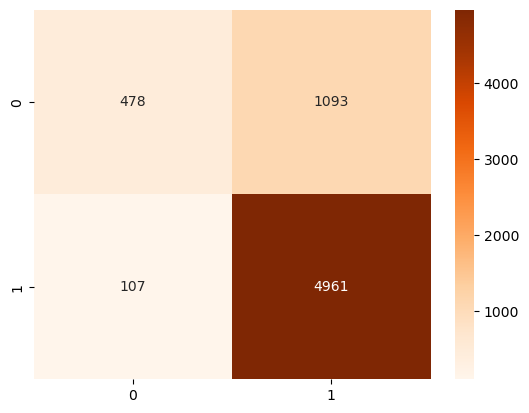

In [28]:
con_matrix = confusion_matrix(y_testing,ensemble_testing_pred6)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Oranges")

In [29]:
auc_roc6 = roc_auc_score(y_testing,ensemble_testing_pred6)
auc_roc6

0.6415759672276267

# Making predictions using the independent classification methods using both the TFIDF and Count Vectorizers

In [30]:
svm__tfidf_preds= tfidf_svm_model.predict(X_testing_tfidf)
rf_tfidf_preds= tfidf_rf_model.predict(X_testing_tfidf)
xg_tfidf_preds= tfidf_xg_model.predict(X_testing_tfidf)


svm_count_preds= count_svm_model.predict(X_testing_count)
rf_count_preds= count_rf_model.predict(X_testing_count)
xg_count_preds= count_xg_model.predict(X_testing_count)

In [31]:
print(classification_report(y_testing,svm__tfidf_preds))

              precision    recall  f1-score   support

           0       0.56      0.70      0.62      1571
           1       0.90      0.83      0.86      5068

    accuracy                           0.80      6639
   macro avg       0.73      0.76      0.74      6639
weighted avg       0.82      0.80      0.81      6639



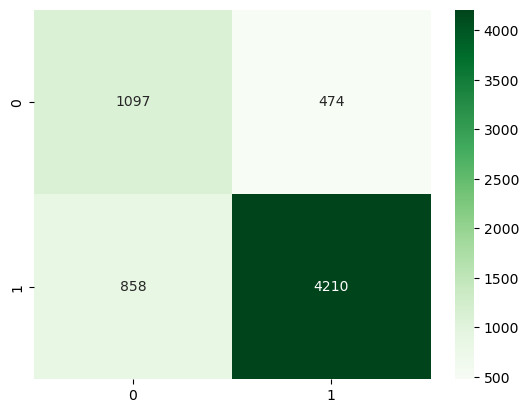

In [32]:
con_matrix = confusion_matrix(y_testing,svm__tfidf_preds)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Greens")

In [33]:
auc_roc_svm__tfidf = roc_auc_score(y_testing,svm__tfidf_preds)
auc_roc_svm__tfidf

0.7644918980917448

In [34]:
print(classification_report(y_testing,rf_tfidf_preds))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62      1571
           1       0.87      0.92      0.90      5068

    accuracy                           0.84      6639
   macro avg       0.78      0.74      0.76      6639
weighted avg       0.83      0.84      0.83      6639



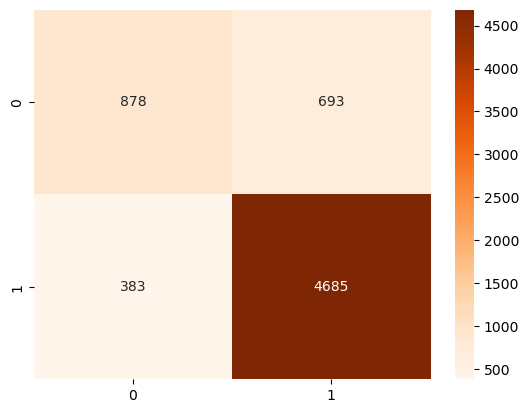

In [35]:
con_matrix = confusion_matrix(y_testing,rf_tfidf_preds)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Oranges")

In [36]:
auc_roc_rf__tfidf = roc_auc_score(y_testing,rf_tfidf_preds)
auc_roc_rf__tfidf

0.7416537383123575

In [37]:
print(classification_report(y_testing,xg_tfidf_preds))

              precision    recall  f1-score   support

           0       0.78      0.32      0.45      1571
           1       0.82      0.97      0.89      5068

    accuracy                           0.82      6639
   macro avg       0.80      0.64      0.67      6639
weighted avg       0.81      0.82      0.79      6639



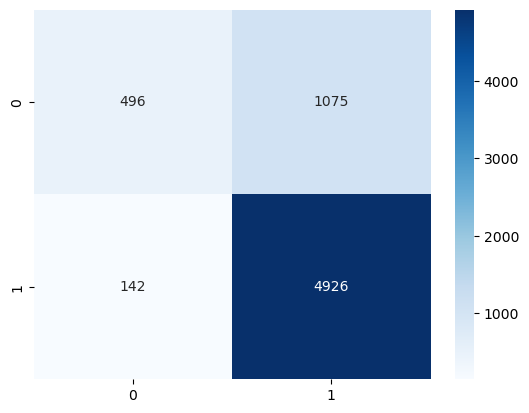

In [38]:
con_matrix = confusion_matrix(y_testing,xg_tfidf_preds)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Blues")

In [39]:
auc_roc_xg__tfidf = roc_auc_score(y_testing,xg_tfidf_preds)
auc_roc_xg__tfidf

0.643851763690449

In [40]:
print(classification_report(y_testing,svm_count_preds))

              precision    recall  f1-score   support

           0       0.54      0.67      0.59      1571
           1       0.89      0.82      0.85      5068

    accuracy                           0.78      6639
   macro avg       0.71      0.74      0.72      6639
weighted avg       0.81      0.78      0.79      6639



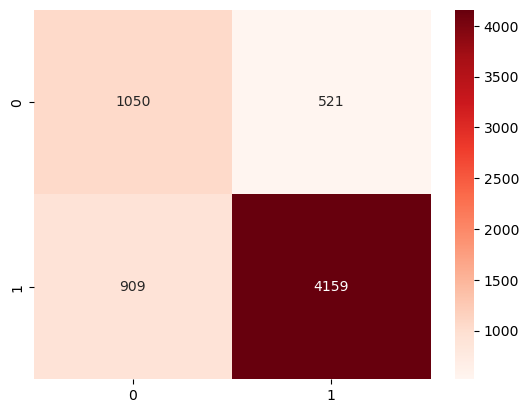

In [41]:
con_matrix = confusion_matrix(y_testing,svm_count_preds)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Reds")

In [42]:
auc_roc_svm_count = roc_auc_score(y_testing,svm_count_preds)
auc_roc_svm_count

0.7445017023728722

In [43]:
print(classification_report(y_testing,rf_count_preds))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62      1571
           1       0.87      0.91      0.89      5068

    accuracy                           0.83      6639
   macro avg       0.77      0.74      0.75      6639
weighted avg       0.82      0.83      0.83      6639



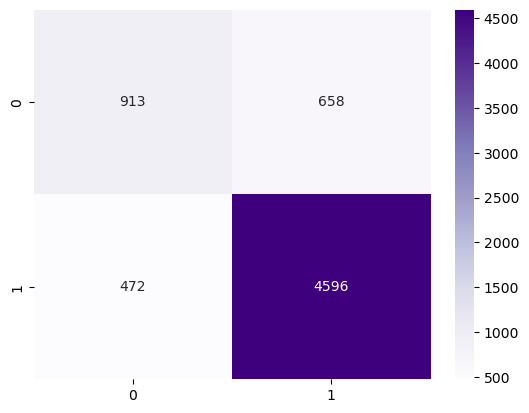

In [44]:
con_matrix = confusion_matrix(y_testing,rf_count_preds)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Purples")

In [45]:
auc_roc_rf_count = roc_auc_score(y_testing,rf_count_preds)
auc_roc_rf_count

0.7440125559105271

In [46]:
print(classification_report(y_testing,xg_count_preds))

              precision    recall  f1-score   support

           0       0.79      0.31      0.45      1571
           1       0.82      0.97      0.89      5068

    accuracy                           0.82      6639
   macro avg       0.81      0.64      0.67      6639
weighted avg       0.81      0.82      0.79      6639



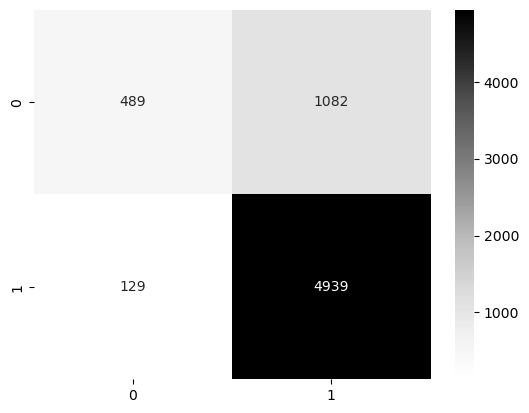

In [47]:
con_matrix = confusion_matrix(y_testing,xg_count_preds)
ax = sns.heatmap(con_matrix, annot=True, fmt="d", cmap="Greys")

In [48]:
auc_roc_xg_count = roc_auc_score(y_testing,xg_count_preds)
auc_roc_xg_count

0.6429064405812333

We are able to see from the above that there are pros and cons to the ensemble method verses the use of just one classification method. In analyizing the classification report, confusion matrix and the AUC-ROC scores for each of the models we are able to see that the emsemble of the SVM and Random Forest classification is performing the best and that the use of SVM independently is showing an overall better prediction, with a slightly lower accuracy then the ensemble. 

In [49]:
accuracy1 = accuracy_score(y_testing, ensemble_testing_pred1)
accuracy2 = accuracy_score(y_testing,svm__tfidf_preds)

print(f"Best Ensemble Accuracy: {accuracy1:.2f}")

print(f"Best Non-Ensemble Accuracy: {accuracy2:.2f}")

Best Ensemble Accuracy: 0.84
Best Non-Ensemble Accuracy: 0.80


In [50]:
y_preds_ensemble1 = pd.DataFrame(ensemble_testing_pred1)

In [51]:
y_preds_svm_tfidf = pd.DataFrame(svm__tfidf_preds)

In [52]:
y_preds_ensemble1.to_excel("../results/Enxembel_Prediction.xlsx")
y_preds_svm_tfidf.to_excel("../results/SVM_Prediction.xlsx")

In [53]:
ensemble_report = classification_report(y_testing,ensemble_testing_pred1,target_names=['Fake', 'Real'],output_dict=True)
ensemble = pd.DataFrame(ensemble_report).transpose()

In [55]:
class_metrics = ensemble.iloc[:2, :3]
class_names = class_metrics.index
metrics = ['precision', 'recall', 'f1-score']
x1 = np.arange(len(class_names))

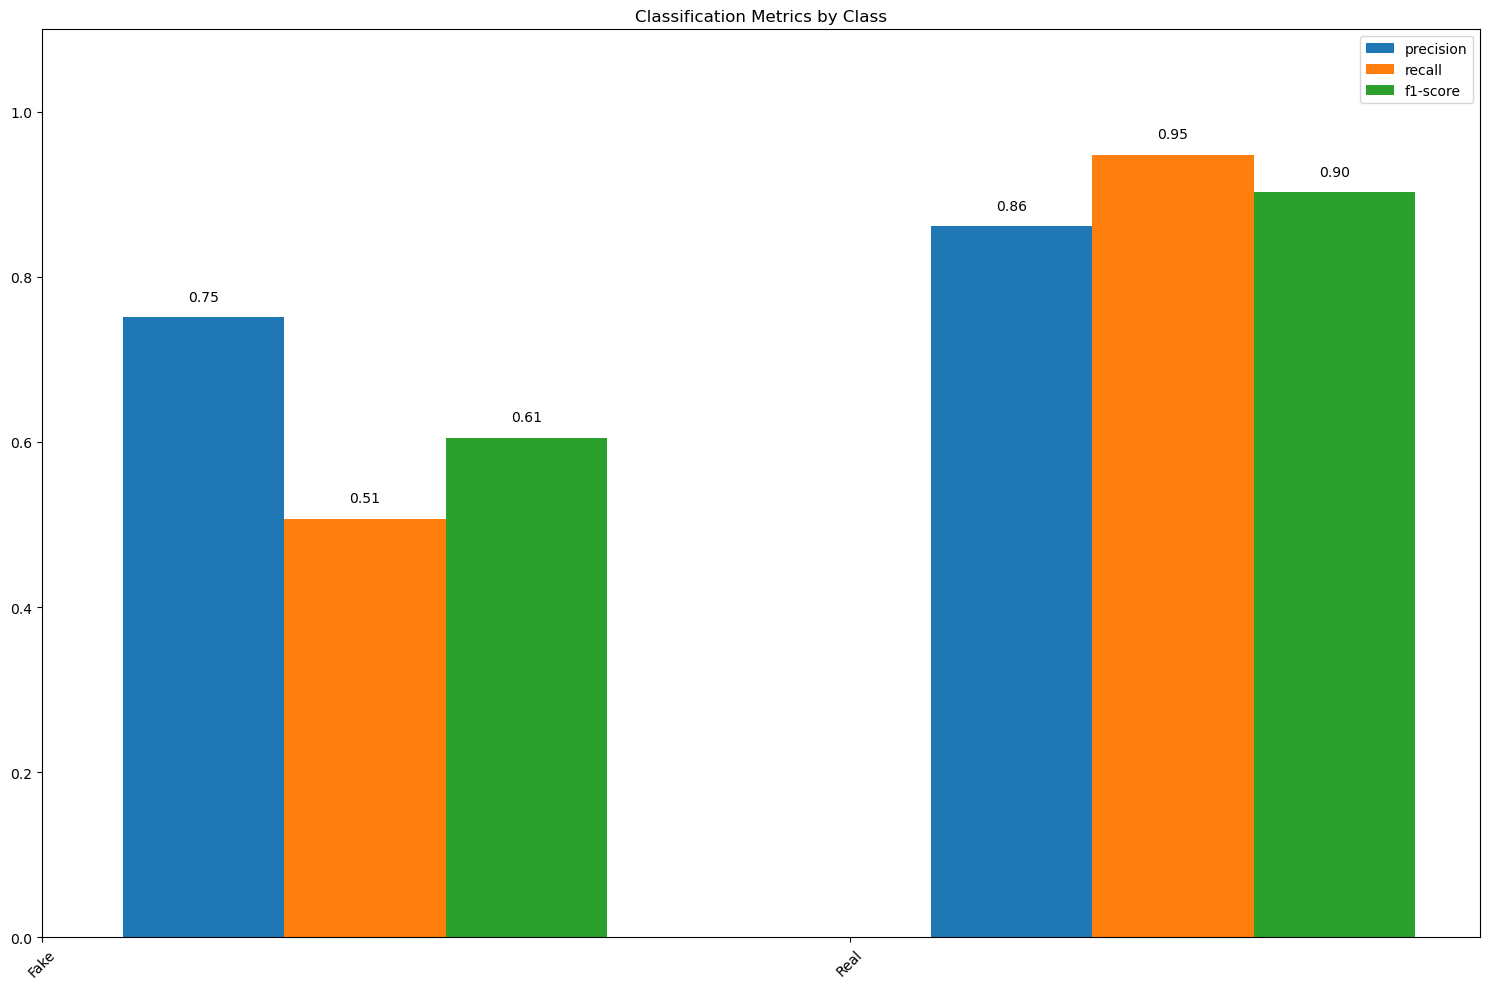

In [56]:
ax = plt.figure(figsize=(15, 10))
for item, metric in enumerate(metrics):
    plt.bar(x1 + (item +1) * 0.2, class_metrics[metric], width=0.20, label=metric)
    for i, value in enumerate(class_metrics[metric]):
        plt.annotate(f"{value:.2f}", (x1[i] + (item + 1) * 0.20, value + 0.02), ha='center')
    
plt.title('Classification Metrics by Class')
plt.ylim(0, 1.1)
plt.legend()
plt.xticks(x1, class_names, rotation=45)
plt.tight_layout()
plt.savefig('../static/images/classification_graph.jpg', dpi=300)
plt.show()

In [58]:
ensemble_data = pd.DataFrame(ensemble_report)
data = ensemble_data.iloc[:-1, :-3]

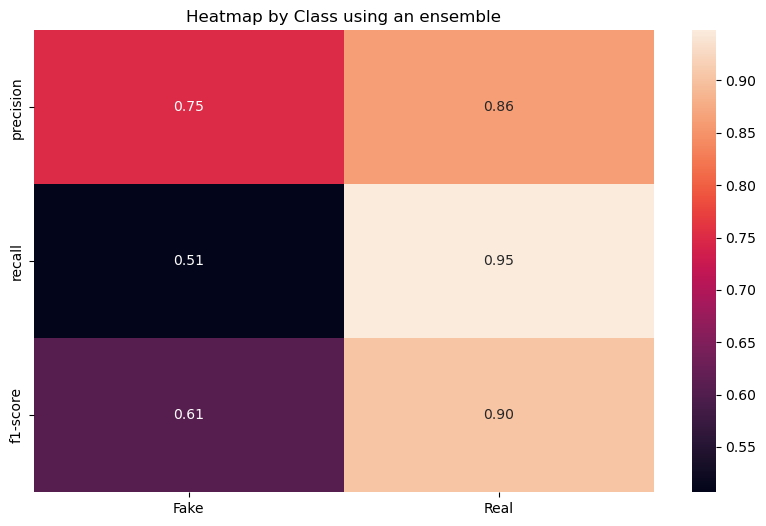

In [59]:
plt.figure(figsize=(10,6))
sns.heatmap(data, annot=True, fmt=".2f")

plt.title('Heatmap by Class using an ensemble')
plt.savefig('../static/images/heatmap.jpg', dpi=300)
plt.show()

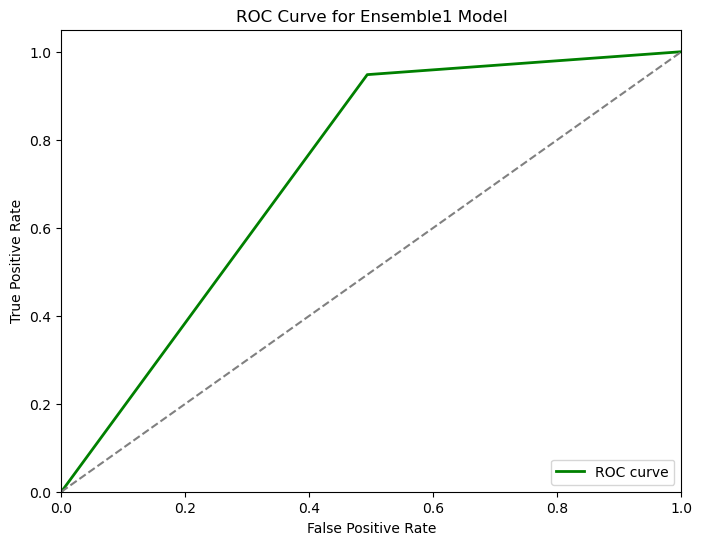

In [60]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_testing, ensemble_testing_pred1)
auc_roc = roc_auc_score(y_testing,ensemble_testing_pred1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble1 Model')
plt.legend(loc="lower right")
plt.show()

In [61]:
svm_report = classification_report(y_testing,svm__tfidf_preds,target_names=['Fake', 'Real'],output_dict=True)
svm_model = pd.DataFrame(svm_report).transpose()

In [62]:
class_metrics = svm_model.iloc[:2, :3]
class_names = class_metrics.index
metrics = ['precision', 'recall', 'f1-score']
x2 = np.arange(len(class_names))

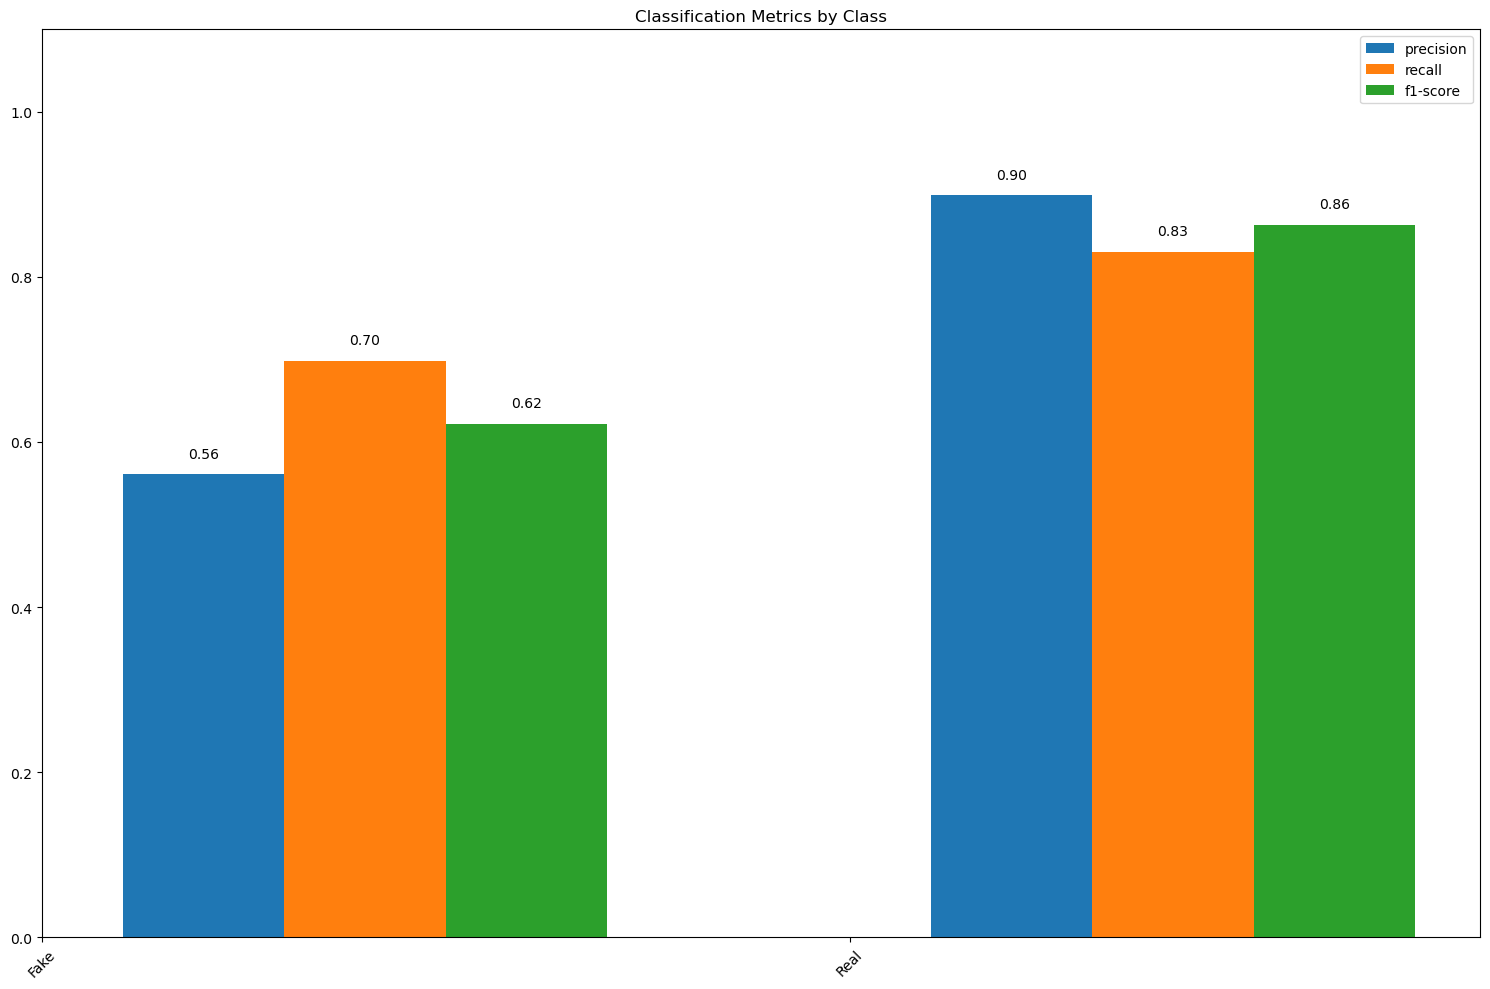

In [63]:
ax = plt.figure(figsize=(15, 10))
for item, metric in enumerate(metrics):
    plt.bar(x2 + (item +1) * 0.2, class_metrics[metric], width=0.20, label=metric)
    for i, value in enumerate(class_metrics[metric]):
        plt.annotate(f"{value:.2f}", (x2[i] + (item + 1) * 0.20, value + 0.02), ha='center')
    
plt.title('Classification Metrics by Class')
plt.ylim(0, 1.1)
plt.legend()
plt.xticks(x1, class_names, rotation=45)
plt.tight_layout()
plt.show()

In [64]:
svm_data = pd.DataFrame(svm_report)
data2 = svm_data.iloc[:-1, :-3]

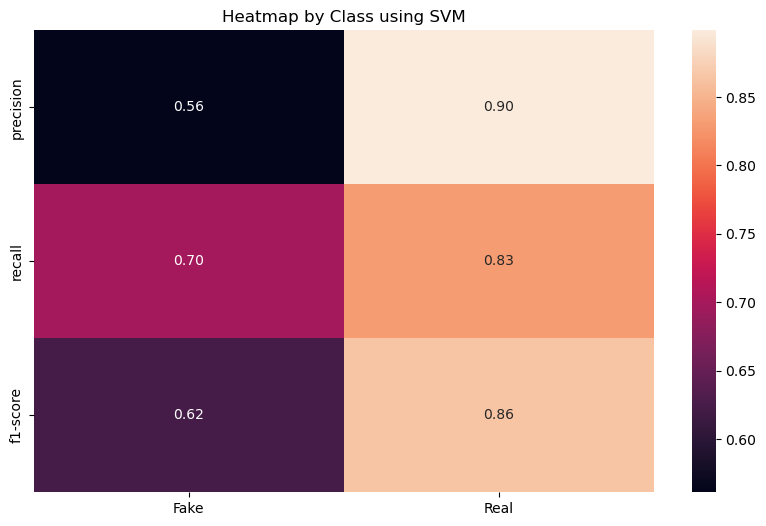

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(data2, annot=True, fmt=".2f")

plt.title('Heatmap by Class using SVM')
plt.show()

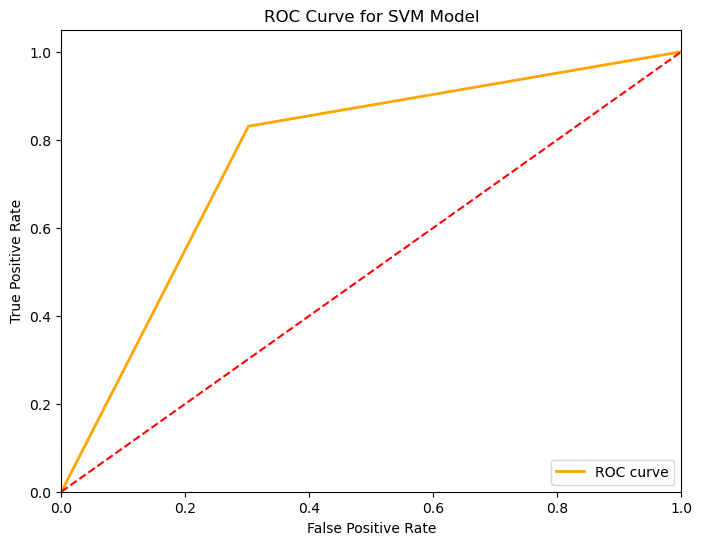

In [66]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y_testing,svm__tfidf_preds)
auc_roc = roc_auc_score(y_testing,svm__tfidf_preds)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Model')
plt.legend(loc="lower right")
plt.show()